In [274]:
#En esta segunda parte trabajaremos con un dataset de R que describe las características
#físicas de un conjunto de diamantes. Puede cargarse mediante get_rdataset(), y está en el
#paquete "ggplot2" con nombre "diamonds".

In [275]:

import numpy as np
import pandas as panda
import matplotlib.pyplot as plt
import scipy as scipy
import statsmodels.api as sm 
import statsmodels.formula.api as smf


In [276]:

diamonds = sm.datasets.get_rdataset("diamonds", "ggplot2")
datos = diamonds.data
datos.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [277]:
#Calcula los valores máximo, mínimo y medio de la variable carat.

In [278]:
carat_min= datos["carat"].min()
print carat_min
carat_max= datos["carat"].max()
print carat_max
carat_min= datos["carat"].mean()
print carat_min

0.2
5.01
0.797939747868


In [279]:
#Dibuja su histograma y sobre el mismo gráfico, el histograma de una muestra aleatoria
#del mismo tamaño con puntos obtenidos de una distribución gamma con la misma
#media y desviación típica. Haz que la visualización sea más adecuada haciendo
#transparente uno de los histogramas utilizando el parámetro alpha.


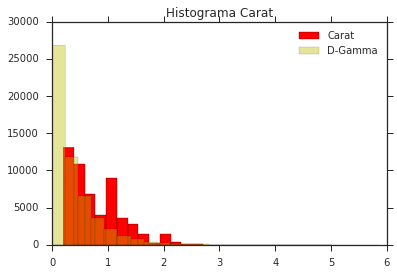

In [280]:
%matplotlib inline

dgamma = np.random.gamma(np.mean(data.carat), np.std(data.carat), data.carat.size)

plt.hist(datos.carat, bins=25, histtype="bar",  color="r", label="Carat")
plt.hist(dgamma, bins=25, histtype="bar",  color="y", alpha=0.4, label="D-Gamma")
plt.title("Histograma Carat")
plt.legend()
plt.show()




In [281]:
# Yo siempre pense que los rayos gamma era lo de Hulk y no una distribución
# https://es.wikipedia.org/wiki/Hulk

In [282]:
#Utilizando matplotlib, dibuja la nube de puntos de carat contra el precio, con ambos
#ejes en escala logarítmica.

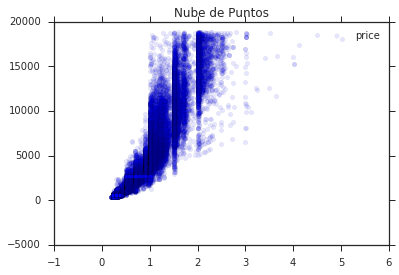

In [283]:
%matplotlib inline

plt.scatter(datos.carat, datos.price, alpha=0.1)
plt.title("Nube de Puntos")
plt.legend()
plt.show()

In [284]:
#Ahora repite el gráfico pero utiliza solo los datos cuyo color sea "E" y su claridad sea "SI1"

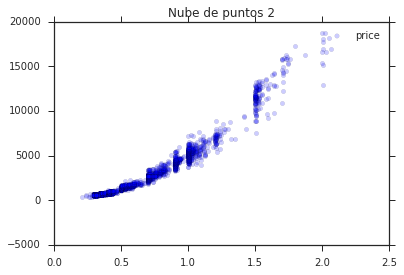

In [285]:

%matplotlib inline
datos_filtro = datos[(data.color=='E') &(datos.clarity=='SI1')]
plt.scatter(datos_filtro.carat, datos_filtro.price, alpha=0.2)
plt.title("Nube de puntos 2")
plt.legend()
plt.show()

In [286]:
#Investiga con un gráfico la relación entre el volumen (que puedes aproximar a partir de
#x, y, z) y el precio, de nuevo en escala logarítmica.

In [287]:
print datos.head(3)

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31


In [336]:
datos["volumen"] = datos.x*datos.y*datos.z
print datos.head(5)

   carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

     volumen  
0  38.202030  
1  34.505856  
2  38.076885  
3  46.724580  
4  51.917250  


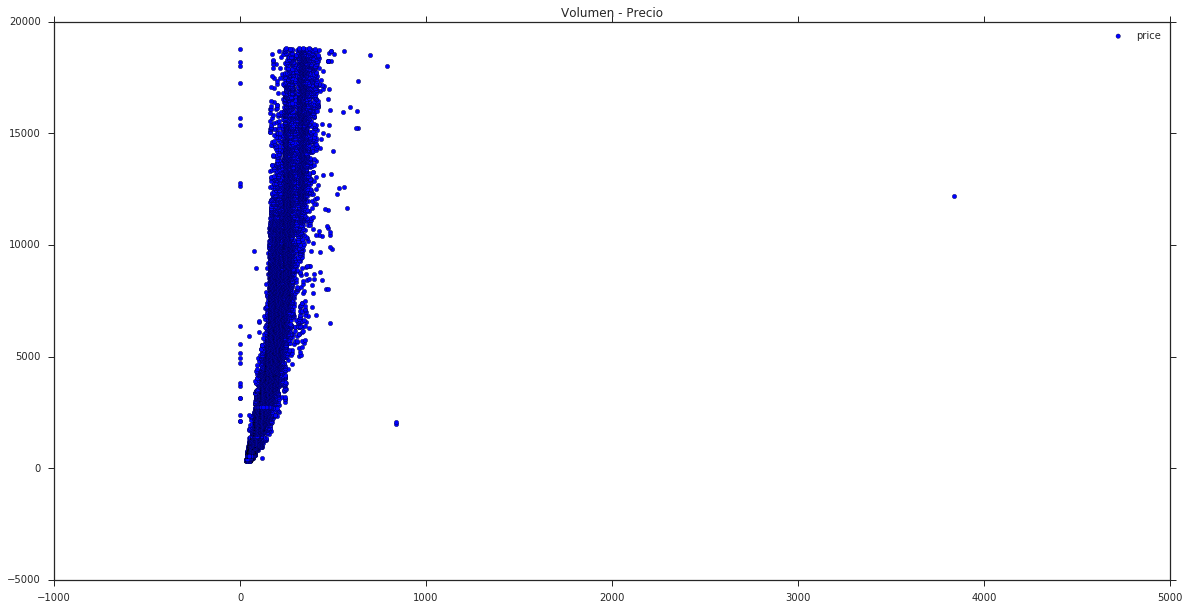

In [289]:
%matplotlib inline
fig = plt.figure(1, figsize=(20, 10))
plt.scatter(datos.volumen , datos.price )
plt.title("Volumen - Precio")
plt.legend()
plt.show()

In [290]:
#aquí tenemos un outlier que nos compromete el grafico. Vamos a localizarlo 

In [291]:
volumen_min= datos["volumen"].min()
print volumen_min
volumen_max= datos["volumen"].max()
print volumen_max
volum_max= datos["volumen"].idxmax()
print volum_max
volumen_min= datos["volumen"].mean()
print volumen_min

0.0
3840.59806
24067
129.849403337


In [292]:
datos.loc[24067]

carat            2
cut        Premium
color            H
clarity        SI2
depth         58.9
table           57
price        12210
x             8.09
y             58.9
z             8.06
volumen     3840.6
Name: 24067, dtype: object

In [293]:
#aquí vemos que mientras el precio en los primeros 10 diamantes es entre 325 y 340 (por ejemplo)

datos.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,volumen
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,38.693952
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,38.830870
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,42.321081
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,36.425214
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,38.718000


In [294]:
#este outlier es más grande y por eso nos cuenta 12.210 
#y de paso nos joroba el grafico por su volumen (ya que se modifica la escala)

In [295]:
#aunque no es el más caro, lo es otro que aun siendo de un volumen bastante más pequeño tiene otras cualidades
#que lo hacen destacar en precio
precio_max= datos["price"].max()
print precio_max
precio_max= datos["price"].idxmax()
print precio_max

18823
27749


In [296]:
datos.loc[27749]

carat         2.29
cut        Premium
color            I
clarity        VS2
depth         60.8
table           60
price        18823
x              8.5
y             8.47
z             5.16
volumen    371.494
Name: 27749, dtype: object

In [297]:
# y porque? pues preguntas aquí
# http://www.diamantes-infos.com/diamante-tallado/evaluacion-diamante.html

In [298]:
#Utilizando scipy.stats, comprueba si se la relación anterior ajusta bien a un modelo de
#regresión lineal, tomando solo los 1000 primeros valores del dataset.

In [299]:
from scipy import stats
from scipy.stats import norm

mil=datos.head(1000)

regresion = sm.OLS(mil.price, mil.volumen).fit()

print regresion.summary()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 3.720e+04
Date:                Mon, 25 Jul 2016   Prob (F-statistic):               0.00
Time:                        19:28:42   Log-Likelihood:                -7466.0
No. Observations:                1000   AIC:                         1.493e+04
Df Residuals:                     999   BIC:                         1.494e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
volumen       22.1492      0.115    192.871      0.0

In [300]:
#R-squared es casi uno por lo que si se ajusta al modelo lineal


In [301]:
#Utilizando seaborn, representa la nube de puntos del precio contra el carat y asociando
#al diagrama las distribuciones de las dos variables.

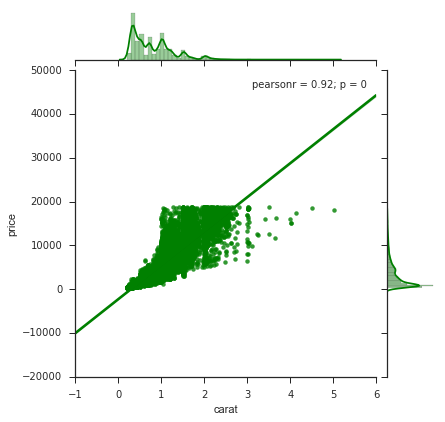

In [302]:
# para que funcione el seaborn hay que me tener en la maldita vventana negra, más comnocido como terminal de ccommando, 
# pip install seaborn

import seaborn as sea 

sea.set(style="ticks")

sea.jointplot(datos.carat, datos.price, kind="reg", color="green")

In [303]:
#Identifica con un comando los diferentes tipos de corte (cut).

In [304]:

print datos["cut"].unique()

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


In [305]:
#Comprueba si hay diferencias significativas en la media del precio para los de corte
#"Ideal" y "Premium" y el resto, tomando 1000 valores de cada (nótese que no se puede
#asumir que las muestras son de una distribución normal). Puedes investigar funciones
#lógicas vectorizadas en NumPy como logical_or().

In [306]:
datos.head(2)


,carat,cut,color,clarity,depth,table,price,x,y,z,volumen
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856


In [320]:
premium = datos[(data.cut=="Premium")]
mean_premium= premium["price"].mean()
print mean_premium

4584.2577043


In [321]:
ideal = datos[(data.cut=="Ideal")]
mean_ideal= ideal["price"].mean()
print mean_ideal

3457.54197021


In [323]:
good = datos[(data.cut=="Good")]
mean_good= good["price"].mean()
print mean_good

3928.86445169


In [324]:
very = datos[(data.cut=="Very Good")]
mean_very= very["price"].mean()
print mean_very

3981.75989075


In [327]:
fair = datos[(data.cut=="Fair")]
mean_fair= fair["price"].mean()
print mean_fair

4358.75776398


In [328]:
# aquí o que he hehco es directamente ofbtener la media de todos los valores y comparar, y así veo que el corte no es 
#suficiente para decidir que un diamante sea mas caro que otro porque la media de ideal es mucho más baja que la de fair
#ppor lo cual es necesario otros factores.

# pero creo que lo que se pide es que se haga de otra manera


In [329]:
datos.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z,volumen
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856


In [330]:
print datos["cut"].unique()

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


In [331]:
datos_1000=datos[np.logical_or(datos["cut"]=="Ideal",datos["cut"]=="Premium" )].head(1000)
media_buenos= datos_1000.price.mean()
print media_buenos

2573.572


In [332]:
otros_1000=datos[np.logical_and(datos["cut"]!="Ideal",datos["cut"]!="Premium" )].head(1000)
media_regulares= otros_1000.price.mean()
print media_regulares

2692.669


In [333]:
# aquí se ve que ambas medias agrupadas por corte y de 1000 elementos son mmuy parecidas
# de hecho es menor media de precio los 1000 diamantes con mejor corte
# Así llegamos a la misma conclusión que antes, que también influyen otras caracteristicas para el precio 

In [334]:
#Obtén la mediana del precio por cada valor de la claridad (clarity) y ordena los
#resultados de manera descendente.

In [335]:
datos.groupby(["clarity"]).median().sort_values("price",ascending=False).price

clarity
SI2     4072
I1      3344
SI1     2822
VS2     2054
VS1     2005
VVS2    1311
VVS1    1093
IF      1080
Name: price, dtype: int64